**Обучение без учителя - Unsupervised Learning**

# Установка библиотек

In [ ]:
import sklearn

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

* **Кластеризация**

Группировка похожих образцов в кластеры. Кластеризация представляет собой великолепный инструмент для анализа данных, сегментации заказчиков, систем выдачи рекомендаций, поисковых механизмов, сегментирования изображений, частичного обучения, понижения размерности

* **Обнаружение аномалий**

Необходимо выяснить, как выглядят "нормальные" данные, с последующим применением этих знаний для обнаружения ненормальных образцов, таких как деффекты изделия, новые тенденции во временном ряде. Другой стороной обнаружения аномалий, является обнаружение новизны.
<a href="https://dyakonov.org/2017/04/19/%D0%BF%D0%BE%D0%B8%D1%81%D0%BA-%D0%B0%D0%BD%D0%BE%D0%BC%D0%B0%D0%BB%D0%B8%D0%B9-anomaly-detection/">Статья про поиск аномалий</a>

# Кластеризация
* сегментация заказчиков
* анализ данных
* методика понижения размерности
* обнаружение аномалий
* частичное обучение
* поисковые механизмы
* сегментация изображений

**Классификация + кластеризация**

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

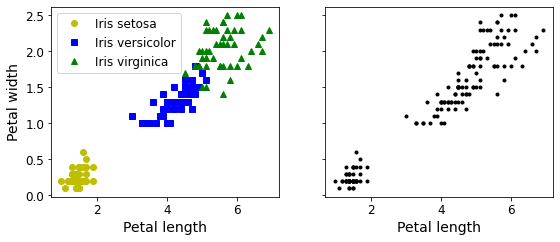

In [ ]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

Модель смеси Гаусса может на самом деле довольно хорошо разделить эти кластеры (используя все 4 функции: длину и ширину лепестка, а также длину и ширину чашелистника).

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

Давайте сопоставим каждый кластер с классом. Вместо жесткого кодирования сопоставления мы выберем наиболее распространенный класс для каждого кластера (используя функцию `scipy.stats.mode ()`):

In [ ]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

{1: 0, 2: 1, 0: 2}

In [ ]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

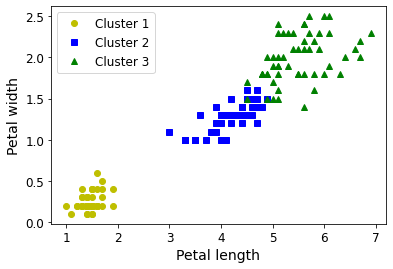

In [ ]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [ ]:
np.sum(y_pred==y)

145

In [ ]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

## K-Means

Целью кластеризации k-means является разделение n точек данных наблюдений на k кластеров в соответствии с определенным стандартом, а точки данных разделяются в соответствии с подобием. У каждого кластера есть центроид.

**Центроид** - это точка, полученная усреднением положений всех точек в кластере. Каждая точка наблюдения принадлежит кластеру, представленному ближайшим к ней центроидом. Модель, выберет метод кластеризации с наименьшей суммой квадратов расстояний (функция потерь) от n точек наблюдения до центроида кластера в качестве выходных данных модели. В кластерном анализе K-средних переменная признака должна быть числовой переменной, чтобы рассчитать расстояние.

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [ ]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [ ]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

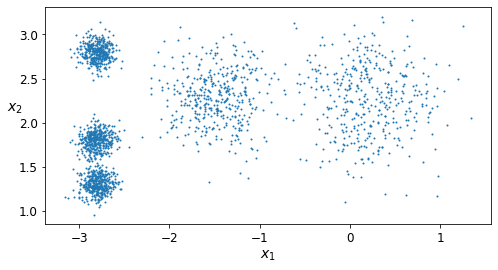

In [ ]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

**Применим алгоритм**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

Каждой сущности была назначена одна из 5 меток:

In [ ]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

Были оценены следующие 5 центроидов (т. е. центров кластеров):

In [ ]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

Обратите внимание, что экземпляр `KMeans` сохраняет метки экземпляров, на которых он был обучен. Несколько сбивает с толку, в этом контексте _label_ экземпляра - это индекс кластера, которому этот экземпляр назначается:

In [ ]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

Конечно, мы можем предсказать метки новых экземпляров:

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

**Решающие границы**

Построим границы решения модели. Это дает нам диаграмму Вороного:

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

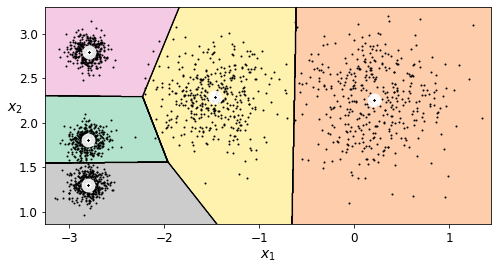

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Неплохо! Некоторые экземпляры рядом с краями, вероятно, были отнесены к неправильному кластеру, но в целом это выглядит неплохо.

**Жесткая и мягкая кластеризации**

Вместо того, чтобы произвольно выбирать ближайший кластер для каждого экземпляра, что называется жесткой кластеризацией, лучше измерить расстояние каждого экземпляра до всех 5 центроидов. Вот что делает метод transform ():

In [ ]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

Вы можете убедиться, что это действительно евклидово расстояние между каждым экземпляром и каждым центроидом:

In [ ]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

### Алгоритм K-Means

Алгоритм K-средних является одним из самых быстрых алгоритмов кластеризации, а также одним из самых простых:
* Сначала инициализируйте `k` центроидов случайным образом: `k` различных экземпляров выбираются случайным образом из набора данных, а центроиды размещаются на своих местах.
* Повторяйте до схождения (т.е. до тех пор, пока центроиды не перестанут двигаться):
    * Назначьте каждый экземпляр ближайшему центроиду.
    * Обновите центроиды, чтобы они были средним значением для назначенных им экземпляров.

Класс `KMeans` по умолчанию применяет оптимизированный алгоритм. Чтобы получить исходный алгоритм K-средних), вы должны установить `init ="random"`, `n_init = 1` и` algorithm = "full" `. Эти гиперпараметры будут объяснены ниже.

Давайте запустим алгоритм K-средних для 1, 2 и 3 итераций, чтобы увидеть, как перемещаются центроиды:

In [ ]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

Отобразим их

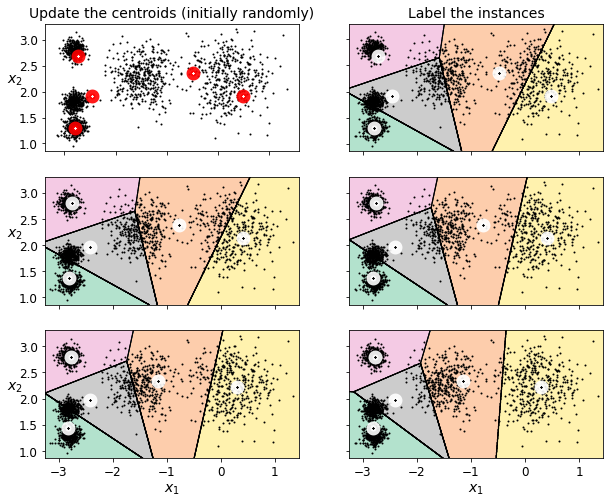

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

**Вариабельность K-средних **

В исходном алгоритме K-средних центроиды просто инициализируются случайным образом, а алгоритм просто выполняет одну итерацию для постепенного улучшения центроидов, как мы видели выше.

Однако одна из основных проблем этого подхода заключается в том, что если вы запускаете K-Means несколько раз (или с разными случайными начальными числами), он может сходиться к очень разным решениям, как вы можете видеть ниже:

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

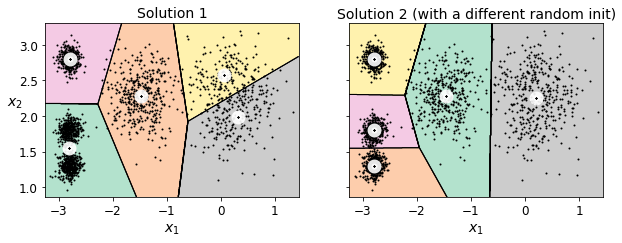

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

### Инерция

Чтобы выбрать лучшую модель, нам понадобится способ оценки производительности модели K-Mean. К сожалению, кластеризация - это неконтролируемая задача, поэтому у нас нет целей. Но, по крайней мере, мы можем измерить расстояние между каждым экземпляром и его центроидом. В этом заключается идея метрики инерции:

In [ ]:
kmeans.inertia_

211.5985372581684

Как вы можете легко убедиться, инерция - это сумма квадратов расстояний между каждым обучающим экземпляром и его ближайшим центроидом:

In [ ]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816868

Метод `score ()` возвращает отрицательную инерцию. Почему отрицательный? Дело в том, что метод предсказателя `score ()` всегда должен соблюдать правило «лучше - лучше».

In [ ]:
kmeans.score(X)

-211.59853725816836

### Множественные инициализации

Таким образом, один из подходов к решению проблемы изменчивости - просто запустить алгоритм K-средних несколько раз с разными случайными инициализациями и выбрать решение, которое минимизирует инерцию. Например, вот инерции двух «плохих» моделей, показанных на предыдущем рисунке:

In [ ]:
kmeans_rnd_init1.inertia_

219.43539442771396

In [ ]:
kmeans_rnd_init2.inertia_

211.5985372581684

Как видите, у них более высокая инерция, чем у первой «хорошей» модели, которую мы обучили, а это значит, что они, вероятно, хуже.

Когда вы устанавливаете гиперпараметр `n_init`, Scikit-Learn запускает исходный алгоритм` n_init` раз и выбирает решение, которое минимизирует инерцию. По умолчанию Scikit-Learn устанавливает n_init = 10.

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=2)

Как видите, мы получаем исходную модель, которая, безусловно, является оптимальным решением K-средних (по крайней мере, с точки зрения инерции и при условии, что $k = 5$).

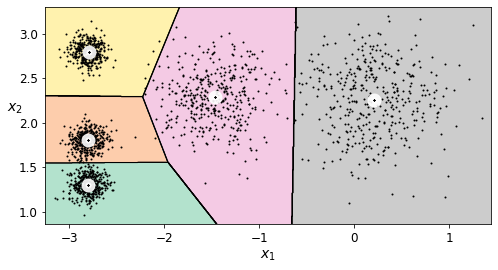

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### Методы инициализации центроидов

Вместо того, чтобы инициализировать центроиды полностью случайным образом, предпочтительно инициализировать их, используя следующий алгоритм, предложенный в [статье 2006 г.](https://goo.gl/eNUPw6) Дэвид Артур и Сергей Васильвицкий:
* Возьмите один центроид $c_1$, выбранный случайным образом из набора данных.
* Возьмите новый центр $c_i$, выбрав экземпляр $\mathbf{x}_i$ с вероятностью: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ где $D(\mathbf{x}_i)$ расстояние между экземплярами $\mathbf{x}_i$ и ближайший центроид, который уже был выбран. Такое распределение вероятностей гарантирует, что экземпляры, которые находятся дальше от уже выбранных центроидов, с большей вероятностью будут выбраны в качестве центроидов.
* Повторяйте предыдущий шаг, пока не будут выбраны все центроиды $k$.

Остальная часть алгоритма K-Means ++ - это просто обычные K-Means. С этой инициализацией алгоритм K-средних с гораздо меньшей вероятностью сойдется к субоптимальному решению, поэтому можно значительно уменьшить `n_init`. В большинстве случаев это в значительной степени компенсирует дополнительную сложность процесса инициализации.

Чтобы установить инициализацию на K-Means ++, просто установите `init =" k-means ++ "` (фактически это значение по умолчанию):

In [ ]:
KMeans()

KMeans()

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

### Ускоренные K-means

Алгоритм K-средних можно значительно ускорить, избегая множества ненужных вычислений расстояний: это достигается за счет использования неравенства треугольника (учитывая три точки A, B и C, расстояние AC всегда таково, что AC ≤ AB + BC) и сохраняя трек нижних и верхних границ для расстояний между экземплярами и центроидами (смотрите в [статье 2003](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) Чарльз Элкан для более подробной информации).

Чтобы использовать вариант K-средних Элькана, просто установите `algorithm =" elkan "`. Обратите внимание, что он не поддерживает разреженные данные, поэтому по умолчанию Scikit-Learn использует «elkan» для плотных данных и «full» (обычный алгоритм K-средних) для разреженных данных.

In [ ]:
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

The slowest run took 9.15 times longer than the fastest. This could mean that an intermediate result is being cached.
50 loops, best of 5: 68.3 ms per loop


In [ ]:
%timeit -n 50 KMeans(algorithm="full", random_state=42).fit(X)

50 loops, best of 5: 40.2 ms per loop


В этом случае нет большой разницы, так как набор данных довольно мал.

### Mini-Batch K-Means

Scikit-Learn также реализует вариант алгоритма K-средних, который поддерживает мини-пакеты (см. [Этот документ](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)):

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [ ]:
minibatch_kmeans.inertia_

211.65239850433215

Если набор данных не умещается в памяти, самый простой вариант - использовать класс memmap. Сначала загрузим MNIST:

In [ ]:
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [ ]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [ ]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

NameError: ignored

Если ваши данные настолько велики, что вы не можете использовать memmap, все усложняется. Начнем с написания функции для загрузки следующего пакета (в реальной жизни данные загружаются с диска):

In [ ]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

Теперь мы можем обучать модель, загружая ее по одной партии. Нам также необходимо реализовать несколько инициализаций и сохранить модель с наименьшей инерцией:

In [ ]:
np.random.seed(42)

In [ ]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [ ]:
best_kmeans.score(X)

-211.62571878891146

Мини-пакетные К-средние намного быстрее, чем обычные К-средние:

In [ ]:
%timeit KMeans(n_clusters=5, random_state=42).fit(X)

10 loops, best of 5: 38.5 ms per loop


In [ ]:
%timeit MiniBatchKMeans(n_clusters=5, random_state=42).fit(X)

100 loops, best of 5: 11.1 ms per loop


Это *намного* быстрее! Однако его производительность часто ниже (более высокая инерция), и он продолжает ухудшаться по мере увеличения _k_. Давайте построим график отношения инерции и отношения времени обучения между K-средними мини-пакетами и обычными K-средними:

In [ ]:
from timeit import timeit

In [ ]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

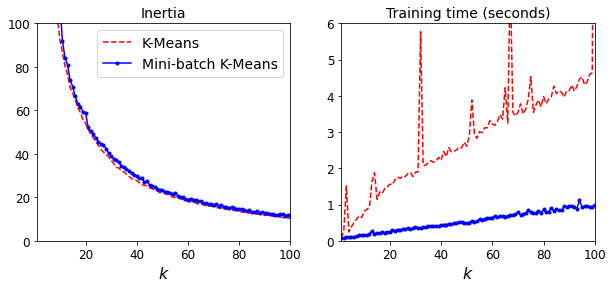

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

### Нахождение оптимального количества кластеров

Что, если для количества кластеров задано значение меньше или больше 5?

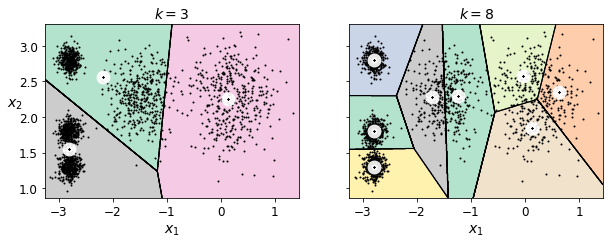

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

Ой, эти две модели выглядят не очень хорошо. А что насчет их инерции?

In [ ]:
kmeans_k3.inertia_

653.216719002155

In [ ]:
kmeans_k8.inertia_

119.11983416102879

Нет, мы не можем просто взять значение $k$, которое минимизирует инерцию, поскольку оно продолжает снижаться по мере увеличения $k$. Действительно, чем больше кластеров, тем ближе каждый экземпляр будет к своему ближайшему центроиду и, следовательно, тем меньше будет инерция. Однако мы можем построить график инерции как функцию $k$ и проанализировать полученную кривую:

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

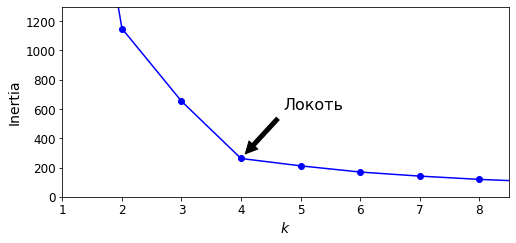

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Локоть',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

Как видите, есть изгиб при $k = 4$, что означает, что меньшее количество кластеров будет плохо, а большее количество кластеров не поможет и может разрезать кластеры пополам. Итак, $k = 4$ - довольно хороший выбор. Конечно, в этом примере это не идеально, поскольку это означает, что два больших двоичных объекта в нижнем левом углу будут рассматриваться как один кластер, но, тем не менее, это довольно хорошая кластеризация.

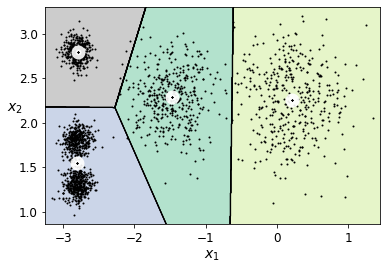

In [ ]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

Другой подход - посмотреть на показатель силуэта, который представляет собой средний коэффициент силуэта по всем экземплярам. Коэффициент силуэта экземпляра равен $(b - a) / \ max(a, b)$, где $a$ - среднее расстояние до других экземпляров в том же кластере (это _среднее расстояние внутри кластера_), и $b$ - это _среднее расстояние до ближайшего кластера_, то есть среднее расстояние до экземпляров следующего ближайшего кластера (определяемого как тот, который минимизирует $b$, исключая собственный кластер экземпляра). Коэффициент силуэта может варьироваться от -1 до +1: коэффициент, близкий к +1, означает, что экземпляр находится внутри своего собственного кластера и далеко от других кластеров, а коэффициент, близкий к 0, означает, что он находится близко к границе кластера, и, наконец, коэффициент, близкий к -1, означает, что экземпляр мог быть назначен не тому кластеру.

Построим график зависимости оценки силуэта от $k$:

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

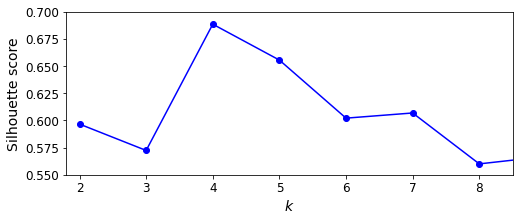

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

Как видите, эта визуализация намного богаче предыдущей: в частности, хотя она и подтверждает, что $k = 4$ - очень хороший выбор, но также подчеркивает тот факт, что $k = 5$ тоже неплох.

Еще более информативная визуализация предоставляется, когда вы наносите на график коэффициент силуэта каждого экземпляра, отсортированный по кластеру, которому они назначены, и по значению коэффициента. Это называется _силуэтной диаграммой_:

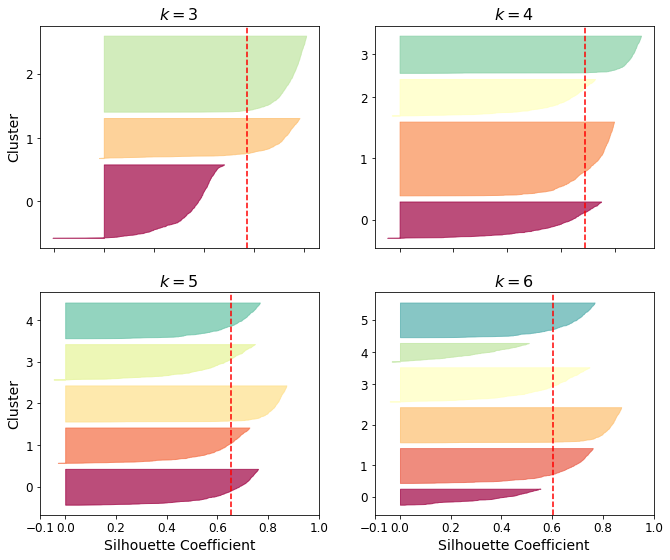

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Как видите, $k = 5$ выглядит здесь лучшим вариантом, поскольку все кластеры примерно одинакового размера, и все они пересекают пунктирную линию, которая представляет собой средний балл по силуэту.

## Пределы K-Means

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

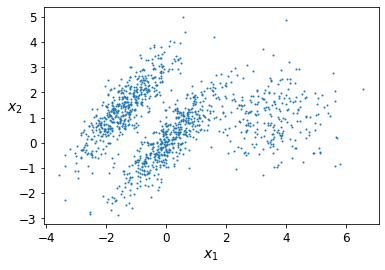

In [ ]:
plot_clusters(X)

In [ ]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

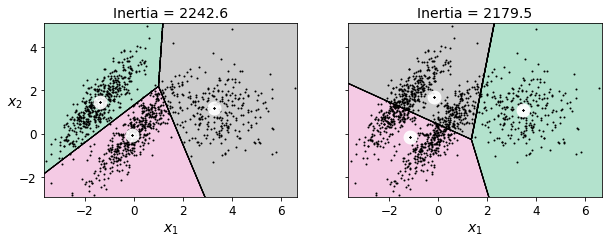

In [ ]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

## Использование кластеризации для сегментации изображений

In [ ]:
# загрузим изображения
PROJECT_ROOT_DIR = "data"
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('data/images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7fdc6e2407d0>)

In [ ]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [ ]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

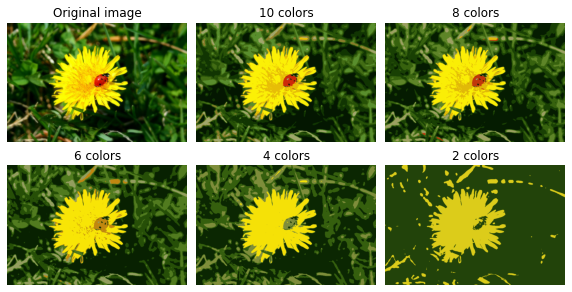

In [ ]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
plt.show()

## Использование кластеризации для предварительной обработки

Давайте рассмотрим _digits dataset_, который представляет собой простой набор данных в стиле MNIST, содержащий 1797 изображений в градациях серого 8 × 8, представляющих цифры от 0 до 9.

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
X_digits, y_digits = load_digits(return_X_y=True)

Разобьем его на обучающий набор и тестовый набор:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

Теперь давайте подберем модель логистической регрессии и оценим ее на тестовом наборе:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train.shape

(1347, 64)

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [ ]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

Хорошо, это наш базовый показатель: точность 96,89%. Посмотрим, сможем ли мы добиться большего, используя K-Means в качестве этапа предварительной обработки. Мы создадим конвейер, который сначала сгруппирует обучающий набор в 50 кластеров и заменит изображения их расстояниями до 50 кластеров, а затем применим модель логистической регрессии:

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [ ]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9777777777777777

Насколько снизилось количество ошибок?

In [ ]:
1 - (1 - pipeline_score) / (1 - log_reg_score)

0.28571428571428414

Как насчет этого? Мы снизили количество ошибок более чем на 35%! Но мы выбрали количество кластеров $k$ совершенно произвольно, у нас наверняка получится лучше. Поскольку K-средние - это всего лишь этап предварительной обработки в конвейере классификации, найти хорошее значение для $k$ намного проще, чем раньше: нет необходимости выполнять анализ силуэта или минимизировать инерцию, лучшее значение $k$ - это просто тот, который обеспечивает лучшую классификацию.

In [ ]:
from sklearn.model_selection import GridSearchCV

**Warning**: the following cell may take close to 20 minutes to run, or more depending on your hardware.

In [ ]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.5s
[CV] END ...............................kmeans_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ..............................kmeans__n_clusters=55; total time=  10.3s
[CV] END ..............................kmeans__n_clusters=56; total time=   5.4s
[CV] END ..............................kmeans__n_clusters=56; total time=   5.4s
[CV] END ..............................kmeans__n_clusters=56; total time=   5.9s
[CV] END ..............................kmeans__n_clusters=57; total time=   6.0s
[CV] END ..............................kmeans__n_clusters=57; total time=   6.6s
[CV] END ..............................kmeans__n_clusters=57; total time=   5.8s
[CV] END ..............................kmeans__n_clusters=58; total time=   6.0s
[CV] END ..............................kmeans__n_clusters=58; total time=   6.7s
[CV] END ..............................kmeans__n_clusters=58; total time=   5.6s
[CV] END ..............................kmeans__n_clusters=59; total time=   5.9s
[CV] END ..............................kmeans__n_clusters=59; total time=   6.0s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

Посмотрим, какое количество кластеров лучше всего:

In [ ]:
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [ ]:
grid_clf.score(X_test, y_test)

0.9777777777777777

## Использование кластеризации для обучения без учителя

Другой вариант использования кластеризации - это полу-контролируемое обучение, когда у нас много немаркированных экземпляров и очень мало помеченных экземпляров.

Давайте посмотрим на производительность модели логистической регрессии, когда у нас есть только 50 помеченных экземпляров:





In [ ]:
n_labeled = 50

In [ ]:
X_train.shape

(1347, 64)

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

Конечно, намного меньше, чем раньше. Посмотрим, как мы можем добиться большего. Сначала сгруппируем обучающий набор в 50 кластеров, затем для каждого кластера найдем изображение, ближайшее к центроиду. Мы будем называть эти изображения репрезентативными изображениями:

In [ ]:
k = 50

In [ ]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

Теперь давайте нарисуем эти репрезентативные изображения и пометим их вручную:

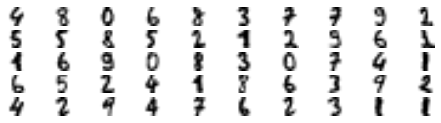

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [ ]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [ ]:
y_representative_digits = np.array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

Теперь у нас есть набор данных, состоящий всего из 50 помеченных экземпляров, но каждый из них не является полностью случайным, а представляет собой репрезентативное изображение своего кластера. Посмотрим, улучшилась ли производительность:

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9222222222222223

Мы подскочили с 83,3% до 91,3%, хотя мы все еще обучаем модель только на 50 экземплярах. Поскольку помечать экземпляры часто бывает дорого и болезненно, особенно когда это делается вручную экспертами, рекомендуется сделать так, чтобы они помечали репрезентативные экземпляры, а не просто случайные экземпляры.

Но, возможно, мы можем пойти еще дальше: что, если бы мы распространили метки на все другие экземпляры в том же кластере?

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [ ]:
log_reg.score(X_test, y_test)

0.9333333333333333

Мы получили небольшое повышение точности. Лучше, чем ничего, но нам, вероятно, следовало бы распространить метки только на экземпляры, наиболее близкие к центроиду, потому что, распространившись на весь кластер, мы определенно включили некоторые выбросы. Давайте распространим метки только на 75-й процентиль, ближайший к центроиду:

In [ ]:
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [ ]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [ ]:
log_reg.score(X_test, y_test)

0.9355555555555556

Чуть лучше. Всего с 50 помеченными экземплярами (всего 5 примеров на класс в среднем!) Мы получили производительность 92,7%, что приближается к производительности логистической регрессии для полностью помеченного набора данных _digits_ (который составлял 96,9%).

Это потому, что распространяемые метки на самом деле довольно хороши: их точность близка к 96%:

In [ ]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9750747756729811

Теперь вы можете сделать несколько итераций *активного обучения*:
1. Вручную пометьте экземпляры, в которых классификатор меньше всего уверен, если возможно, выбрав их в отдельные кластеры.
2. Обучите новую модель с помощью этих дополнительных меток.

## DBSCAN

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [ ]:
len(dbscan.core_sample_indices_)

808

In [ ]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [ ]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [ ]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

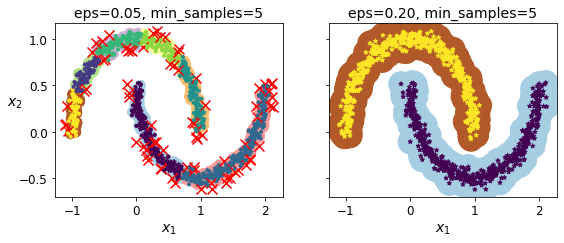

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [ ]:
dbscan = dbscan2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [ ]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

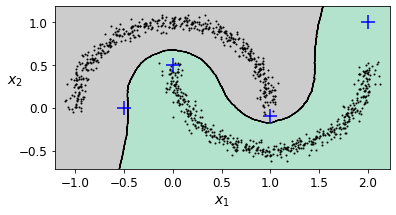

In [ ]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [ ]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

## Другие алгоритмы кластеризации

### Спектральная кластеризация

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [ ]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [ ]:
np.percentile(sc1.affinity_matrix_, 95)

0.04251990648936265

In [ ]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

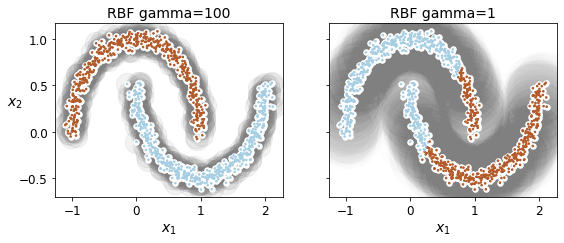

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

### Агломеративная кластеризация

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg1 = AgglomerativeClustering(linkage="complete", n_clusters=2).fit(X)
agg2 = AgglomerativeClustering(linkage="complete", distance_threshold=2.4, n_clusters=None).fit(X)

In [ ]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [ ]:
learned_parameters(agg1)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [ ]:
agg1.children_

array([[ 427,  675],
       [ 557,  782],
       [ 126,  597],
       ...,
       [1990, 1994],
       [1986, 1995],
       [1996, 1997]])

In [ ]:
set(agg1.labels_)

{0, 1}

In [ ]:
def plot_agglomerative_clustering(agg, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=agg.labels_, cmap="Paired")

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("Agg gamma=", fontsize=14)

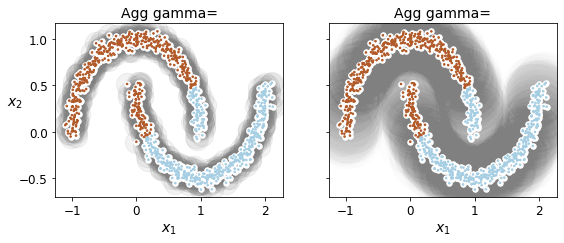

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_agglomerative_clustering(agg1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_agglomerative_clustering(agg2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

# Смеси Гауссовых распределений

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

Давайте обучим модель смеси Гаусса на предыдущем наборе данных:

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

Давайте посмотрим на параметры, которые оценил алгоритм EM:

In [ ]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [ ]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [ ]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

Действительно ли алгоритм сходился?

In [ ]:
gm.converged_

True

Да хорошо. Сколько итераций потребовалось?

In [ ]:
gm.n_iter_

4

Теперь вы можете использовать модель, чтобы предсказать, к какому кластеру принадлежит каждый экземпляр (жесткая кластеризация) или вероятности того, что он пришел из каждого кластера. Для этого просто используйте метод pred() или метод pred_proba():

In [ ]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

In [ ]:
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

Это генеративная модель, поэтому вы можете выбирать из нее новые экземпляры (и получать их метки):

In [ ]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [ ]:
y_new

array([0, 0, 1, 2, 2, 2])

Обратите внимание, что они выбираются последовательно из каждого кластера.

Вы также можете оценить логарифм _функции плотности вероятности_ (PDF) в любом месте, используя метод `score_samples()`:

In [ ]:
gm.score_samples(X)

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

Давайте проверим, что PDF интегрируется в 1 по всему пространству. Мы просто берем большой квадрат вокруг кластеров и разрезаем его на сетку из крошечных квадратов, а затем вычисляем приблизительную вероятность того, что экземпляры будут сгенерированы в каждом крошечном квадрате (путем умножения PDF в одном углу крошечного квадрата на площадь квадрата), и, наконец, суммируя все эти вероятности). Результат очень близок к 1:

In [ ]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999215021

Теперь построим полученные границы решения (пунктирные линии) и изолинии плотности:

In [ ]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

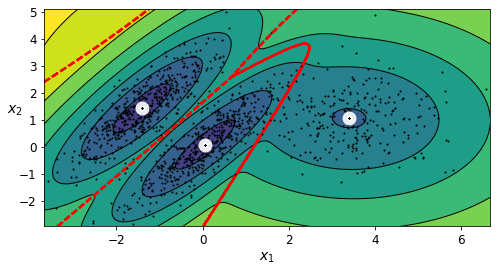

In [ ]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

Вы можете наложить ограничения на ковариационные матрицы, которые ищет алгоритм, установив гиперпараметр `covariance_type`:
* `"full"` (по умолчанию): без ограничений, все кластеры могут принимать любую эллипсоидальную форму любого размера.
* `"tied"`: все кластеры должны иметь одинаковую форму, которая может быть любым эллипсоидом (т. е. все они имеют одну и ту же матрицу ковариаций).
* `"spherical"`: все кластеры должны быть сферическими, но они могут иметь разный диаметр (т. е. разную дисперсию).
* `"diag"`: кластеры могут принимать любую эллипсоидальную форму любого размера, но оси эллипсоида должны быть параллельны осям (т.е. ковариационные матрицы должны быть диагональными).

In [ ]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [ ]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)


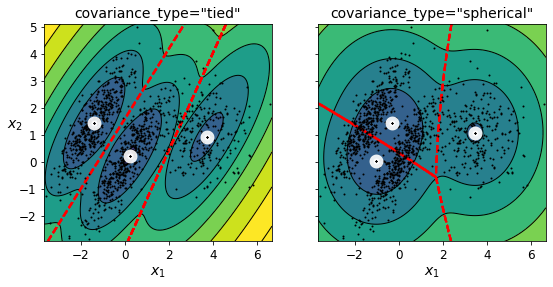

In [ ]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

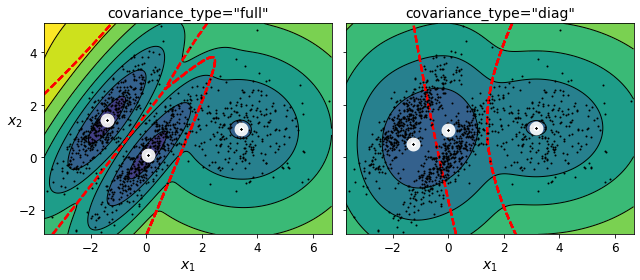

In [ ]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

## Поиск аномалий на основе смеси распределений Гаусса

Смеси Гаусса могут использоваться для _обнаружения аномалий_: экземпляры, расположенные в областях с низкой плотностью, могут считаться аномалиями. Вы должны определить, какой порог плотности вы хотите использовать. Например, в производственной компании, которая пытается обнаружить дефектные продукты, обычно хорошо известно соотношение дефектных продуктов. Скажем, он равен 4%, тогда вы можете установить порог плотности как значение, которое приводит к тому, что 4% экземпляров находятся в областях ниже этой пороговой плотности:

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

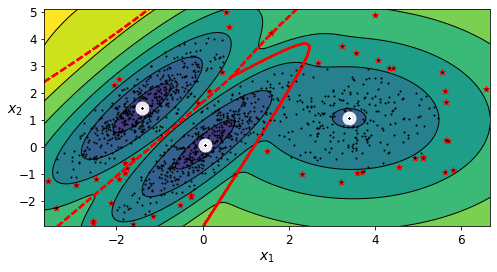

In [ ]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

## Выбор количества кластеров

Мы не можем использовать оценку инерции или силуэта, потому что они оба предполагают, что кластеры имеют сферическую форму. Вместо этого мы можем попытаться найти модель, которая минимизирует теоретический информационный критерий, такой как байесовский информационный критерий (BIC) или информационный критерий Акаике (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ - количество экземпляров.
* $p$ - количество параметров, изученных моделью.
* $\hat L$ - максимальное значение функции правдоподобия модели. Это условная вероятность наблюдаемых данных $\mathbf{X}$ с учетом модели и ее оптимизированных параметров.

И BIC, и AIC наказывают модели, у которых есть больше параметров для изучения (например, больше кластеров), и поощряют модели, которые хорошо соответствуют данным (то есть модели, которые дают высокую вероятность наблюдаемым данным).

In [ ]:
gm.bic(X)

8189.747000497186

In [ ]:
gm.aic(X)

8102.521720382148

Мы могли бы вычислить BIC вручную следующим образом:

In [ ]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [ ]:
bic, aic

(8189.747000497186, 8102.521720382148)

In [ ]:
n_params

17

На кластер один вес, но сумма должна быть равна 1, поэтому у нас на одну степень свободы меньше, следовательно, -1. Аналогично, степени свободы для $n \times n$ ковариационная матрица не $n^2$, но $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.

Обучим модели Gaussian Mixture с различными значениями $k$ и измерим их BIC:

In [ ]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [ ]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

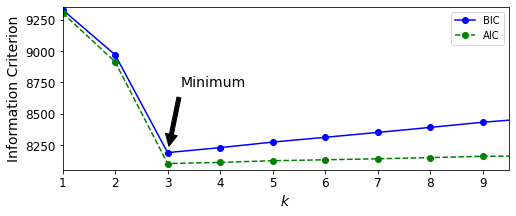

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

Давайте поищем лучшую комбинацию значений как для количества кластеров, так и для гиперпараметра `covariance_type`:

In [ ]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [ ]:
best_k

3

In [ ]:
best_covariance_type

'full'

## Байесовские модели Гауссовых смесей

Вместо того, чтобы вручную искать оптимальное количество кластеров, можно использовать вместо него класс `BayesianGaussianMixture`, который может давать веса, равные (или близкие) к нулю, ненужным кластерам. Просто установите для количества компонентов значение, которое, по вашему мнению, превышает оптимальное количество кластеров, и алгоритм автоматически устранит ненужные кластеры.

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

In [ ]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

Алгоритм автоматически определил, что необходимы всего 3 компонента:

In [ ]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

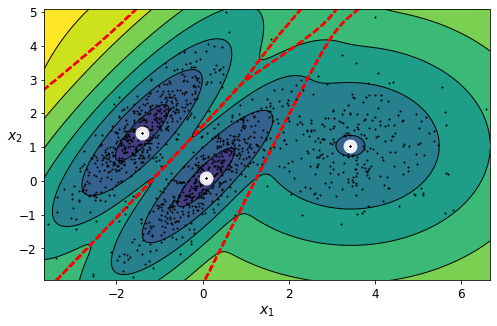

In [ ]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [ ]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

In [ ]:
np.round(bgm_low.weights_, 2)

array([0.52, 0.48, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
np.round(bgm_high.weights_, 2)

array([0.01, 0.18, 0.27, 0.11, 0.01, 0.01, 0.01, 0.01, 0.37, 0.01])

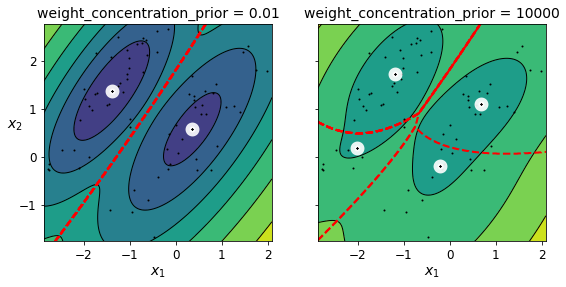

In [ ]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

plt.show()

Примечание: тот факт, что вы видите только 3 области на правом графике, хотя есть 4 центроида, не является ошибкой. Вес верхнего правого кластера намного больше веса нижнего правого кластера, поэтому вероятность того, что любая заданная точка в этой области принадлежит верхнему правому кластеру, больше, чем вероятность того, что она принадлежит нижнему правому кластеру. кластер.

In [ ]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

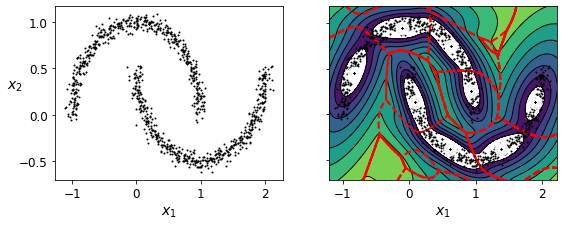

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()

Вместо обнаружения 2 кластеров в форме луны, алгоритм обнаружил 8 эллипсоидальных кластеров. Однако график плотности выглядит неплохо, поэтому его можно использовать для обнаружения аномалий.